<a href="https://colab.research.google.com/github/Kuldeep995/Machine_Learning/blob/master/1801093MLassignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initializing**

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from copy import deepcopy

Load and visualise Dataset

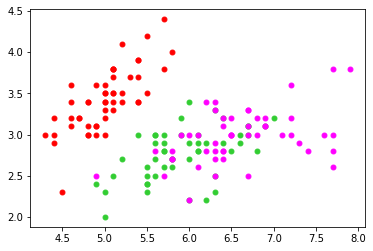

In [ ]:
data = load_iris()
X = data['data']
y = data['target']
n = X.shape[0]
c = X.shape[1]
colors=['red', 'limegreen', 'magenta']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=24, color = colors[int(y[i])])

Implementing Kmeans

Elbow Method

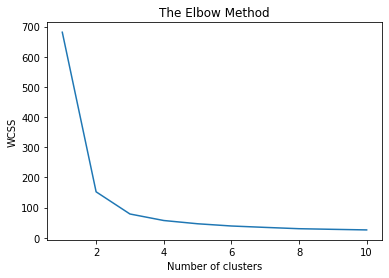

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Algorithm

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


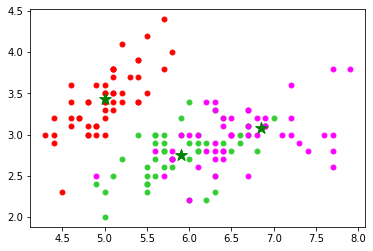

In [ ]:
K = 3
n = X.shape[0]
c = X.shape[1]
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K,c)*std + mean

centersOld = np.zeros(centers.shape)
centersNew = deepcopy(centers)
clusters = np.zeros(n)
distances = np.zeros((n,K))
error = np.linalg.norm(centersNew - centersOld)
while error != 0:
    for i in range(K):
        distances[:,i] = np.linalg.norm(X - centersNew[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    centersOld = deepcopy(centersNew)
    for i in range(K):
        centersNew[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centersNew - centersOld)
print(centersNew)

for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=24, color = colors[int(y[i])])
plt.scatter(centersNew[:,0], centersNew[:,1], marker='*', c='g', s=150)

K Means using library

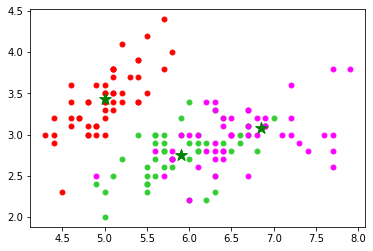

In [ ]:
Kmean = KMeans(n_clusters = K)
Kmean.fit(X)
centersLib = Kmean.cluster_centers_
colors=['red', 'limegreen', 'magenta']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=24, color = colors[int(y[i])])
plt.scatter(centersLib[:,0], centersLib[:,1], marker='*', c='g', s=150)